In [75]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [76]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [77]:
#remove unneccessary columns
df.drop(columns= ['Unnamed: 0',"year","month"],axis=1, inplace=True)

In [78]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [79]:
# check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

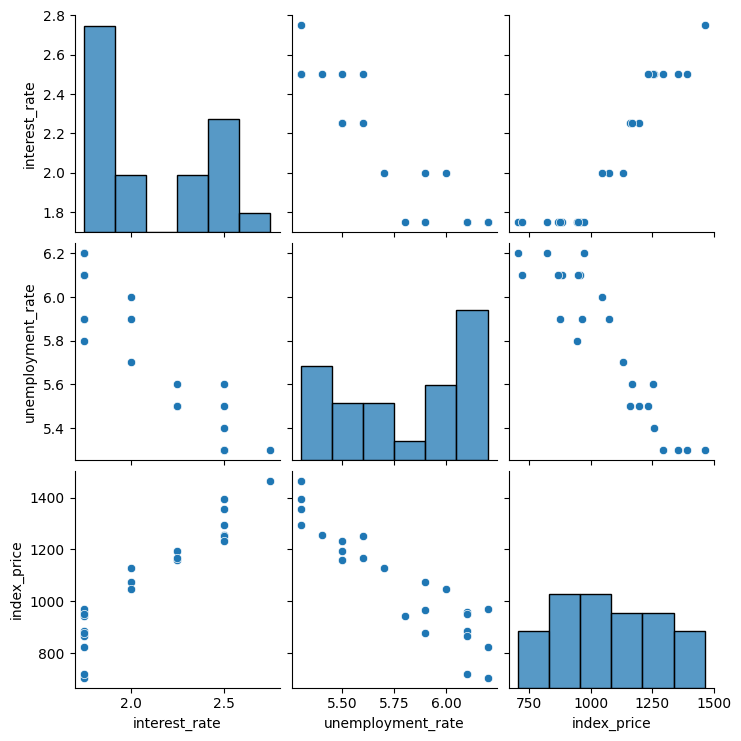

In [80]:
#visualize the data
import seaborn as sns
sns.pairplot(df)


In [81]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

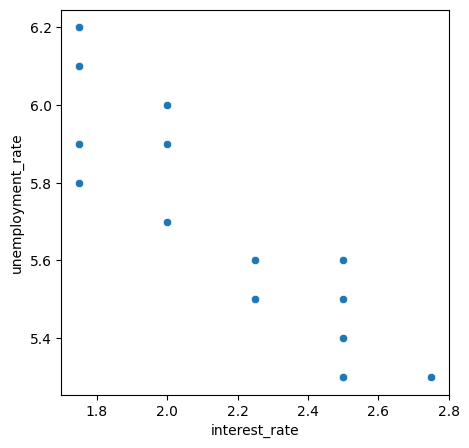

In [82]:
# visualize the datapoin more closely
plt.figure(figsize=(5,5))
sns.scatterplot(x="interest_rate",y='unemployment_rate',data = df)

In [83]:
# split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [84]:
print(y)

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64


In [85]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [86]:
#train and split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)

<Axes: xlabel='interest_rate', ylabel='index_price'>

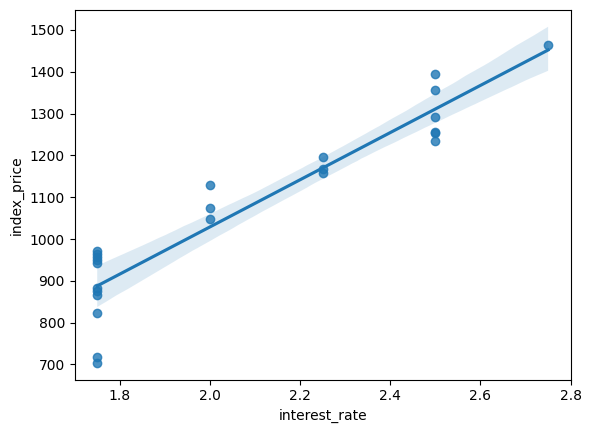

In [87]:
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

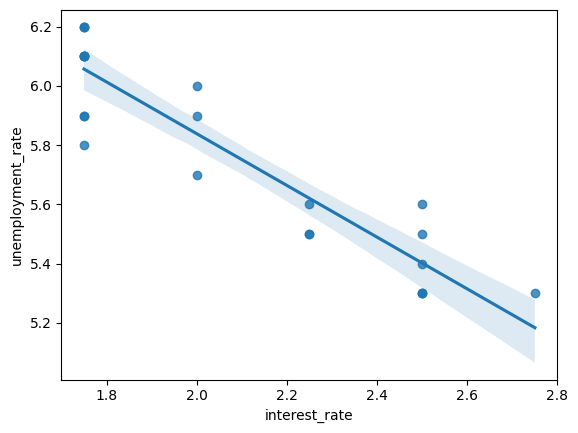

In [88]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

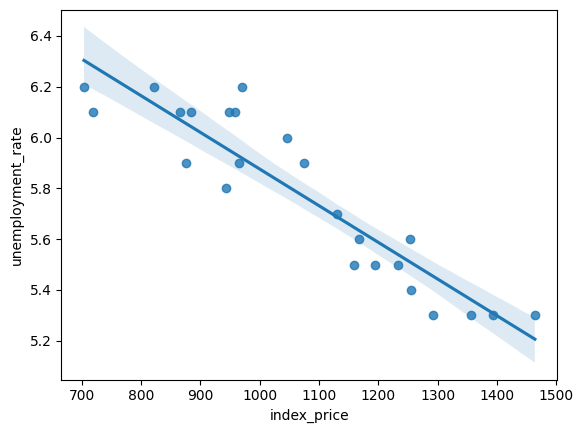

In [89]:
sns.regplot(x='index_price',y='unemployment_rate',data=df)

In [90]:
# standardization the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train 

array([[ 1.03209369, -1.28009521],
       [-1.06895418,  0.45717686],
       [-1.06895418,  1.03626755],
       [-1.06895418,  1.3258129 ],
       [ 0.3317444 , -0.70100452],
       [ 1.03209369, -0.70100452],
       [-1.06895418,  1.03626755],
       [ 1.03209369, -0.99054987],
       [ 1.03209369, -1.28009521],
       [ 1.03209369, -0.41145918],
       [-1.06895418,  1.03626755],
       [ 0.3317444 , -0.41145918],
       [ 0.3317444 , -0.70100452],
       [-1.06895418,  1.03626755],
       [ 1.03209369, -1.28009521],
       [ 1.73244298, -1.28009521],
       [-1.06895418,  1.3258129 ],
       [-1.06895418,  1.03626755],
       [-0.36860489,  0.74672221]])

# Model Building

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [93]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train,y_train, scoring= "neg_mean_squared_error",cv=5)
# For every validation we get MSE, which is negative.

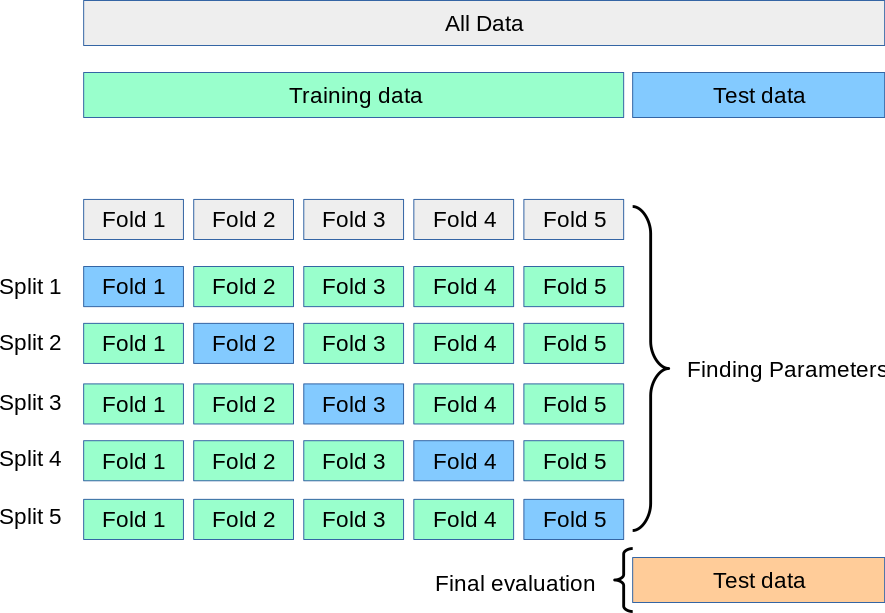

In [99]:
validation_score

array([-11956.11988397,  -3980.82968088,   -447.38408825,  -1495.38123485,
        -3231.51782411])

In [95]:
np.mean(validation_score)

np.float64(-4222.246542411691)

In [96]:
# prediction
y_pred = regression.predict(X_test)
y_pred

array([1023.32247097, 1062.29033293,  872.23516582,  950.17088973,
        930.68695875])

In [97]:
# performance metrics
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("R2:",score)
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 7720.064431558651
MAE: 69.89604208095452
RMSE: 87.86389720219933
R2: 0.6613091768846912
0.3226183537693823


# Assumption

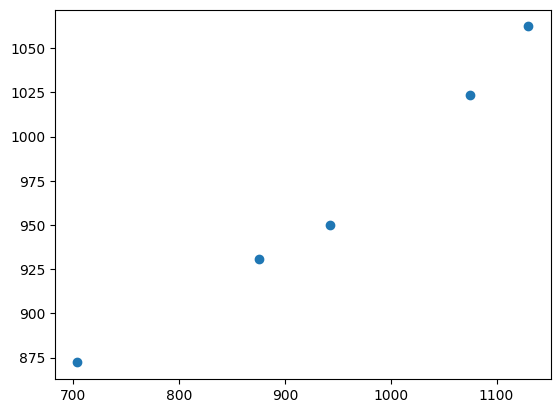

In [102]:
plt.scatter(y_test,y_pred)
# show linear relationship between the actual and predicted values

In [103]:
residual = y_test - y_pred
print(residual)

11     51.677529
10     67.709667
22   -168.235166
14     -7.170890
20    -54.686959
Name: index_price, dtype: float64


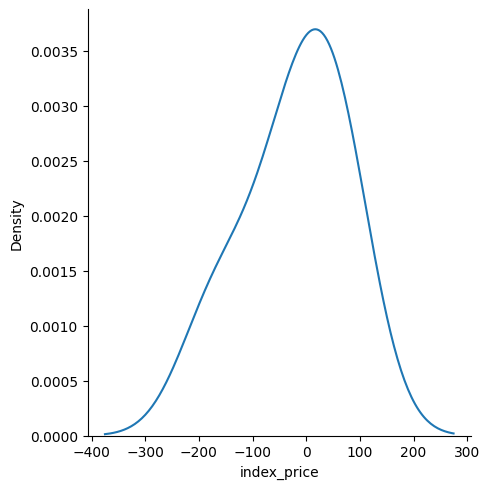

In [109]:
# plot residual
sns.displot(residual,kind='kde')
# we can see that the residual is normally distributed. so model is good

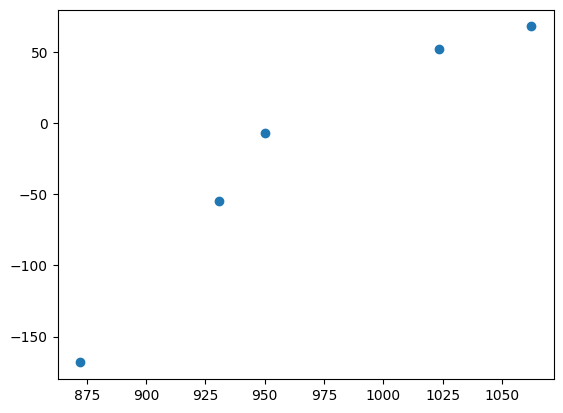

In [111]:
# scatter plot with respect to prediction and residual
plt.scatter(y_pred,residual)
# if we see uniformly distributed then model is good. but here we can see some pattern. so model is not good

In [112]:
#OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
model.summary()

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):             -0.083
Method:                 Least Squares   F-statistic:                             0.2716
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                       0.765
Time:                        19:43:37   Log-Likelihood:                         -160.10
No. Observations:                  19   AIC:                                      324.2
Df Residuals:                      17   BIC:                                      326.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           132.2704    876.248      0.151      0.882   -1716.452    1980.993
x2           -67.2915    876.248     -0.077      0.940   -1916.014    1781.431
==============================================================================
Omnibus:                        6.272   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                3.668
Skew:                          -0.872   Prob(JB):                        0.160
Kurtosis:                       4.261   Cond. No.                         6.39
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
print(regression.coef_)

[132.27044464 -67.29146667]


In [116]:
## Prediction For new data
regression.predict(scaler.transform([[2.75,5.3]]))

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1418.1325935])